---
## 1. Load Data

In [17]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [18]:
# You might want to use the following package
from pandas.plotting import scatter_matrix # optional
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Your code goes here for this section.
import pandas as pd
import numpy as np

#data = pd.read_csv('US_Accidents_March23.csv')
#columns_to_read = ['Source', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'State']
#columns_to_read = ['Severity', 'Start_Lat', 'Start_Lng', 'State', 'Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)']
#data = pd.read_csv('US_Accidents_March23.csv', usecols=columns_to_read)

filtered_df = pd.DataFrame()

chunksize = 10 ** 6
for chunk in pd.read_csv('US_Accidents_March23.csv', chunksize=chunksize):
    filtered_chunk = chunk[chunk['State'] == 'VA']

    # Append the filtered rows to the filtered_df
    filtered_df = pd.concat([filtered_df, filtered_chunk], ignore_index=True)

data = filtered_df
data.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-228566,Source2,3,2016-11-30 16:45:09,2016-11-30 17:14:40,38.815727,-77.138252,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-228570,Source2,3,2016-11-30 17:15:38,2016-11-30 17:45:17,38.954506,-77.193832,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
2,A-228591,Source2,3,2016-11-30 18:31:42,2016-11-30 19:01:22,39.217541,-78.137474,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Night,Night
3,A-228592,Source2,3,2016-11-30 18:26:51,2016-11-30 18:56:30,38.834152,-77.218185,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
4,A-228593,Source2,3,2016-11-30 18:30:23,2016-11-30 19:00:01,38.794235,-77.054161,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
5,A-228596,Source2,3,2016-11-30 18:50:18,2016-11-30 19:19:34,38.868732,-77.308899,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Night,Night
6,A-228599,Source2,3,2016-11-30 19:09:27,2016-11-30 19:39:05,38.846519,-77.079269,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
7,A-228606,Source2,2,2016-11-30 19:43:03,2016-11-30 20:12:31,39.142986,-77.652184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
8,A-228607,Source2,2,2016-11-30 19:35:25,2016-11-30 20:05:10,38.925026,-77.507858,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
9,A-228608,Source2,2,2016-11-30 19:36:46,2016-11-30 20:06:29,39.060562,-77.459206,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night


In [19]:
#mask = data['State'] == 'VA'
#data = data[mask]
to_be_removed = ['State', 'ID', 'Source', 'Description', 'Country', 'Timezone',
                 'Start_Time', 'End_Time', 'End_Lat', 'End_Lng', 'Weather_Timestamp',
                 'Precipitation(in)', 'Wind_Chill(F)',] # features with missing values
for r in to_be_removed:
    del data[r]
data.head(3)

,Severity,Start_Lat,Start_Lng,Distance(mi),Street,City,County,Zipcode,Airport_Code,Temperature(F),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,38.815727,-77.138252,0.01,Duke St,Alexandria,Alexandria,22312,KDCA,64.0,...,False,False,False,False,False,False,Day,Day,Day,Day
1,3,38.954506,-77.193832,0.01,Capital Beltway N,Mc Lean,Fairfax County,22101,KDCA,64.0,...,False,False,False,False,False,False,Night,Day,Day,Day
2,3,39.217541,-78.137474,0.01,I-81 N,Winchester,Frederick,22603,KOKV,53.6,...,False,False,False,False,True,False,Night,Night,Night,Night


---
## 2. Data Discovery and Visualization

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

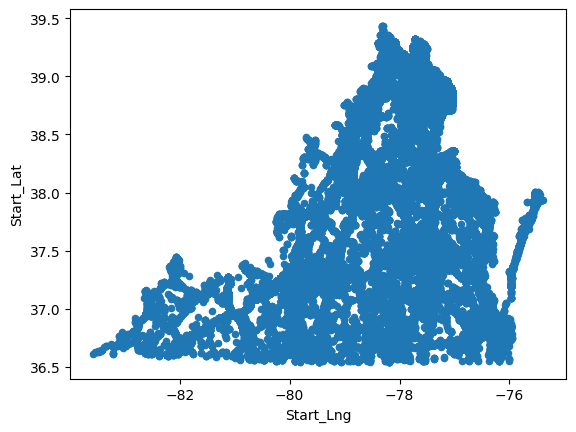

In [6]:
data.plot(kind="scatter", x="Start_Lng", y="Start_Lat")

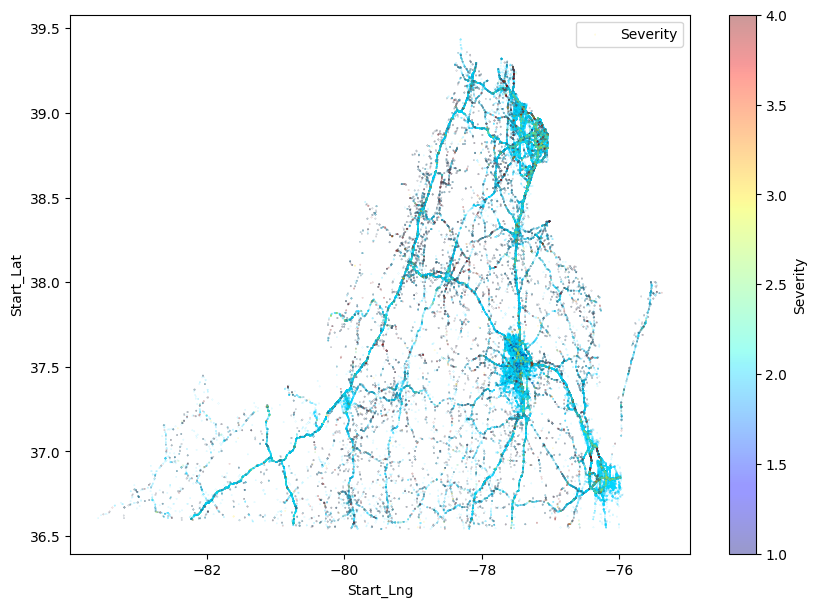

In [7]:
import matplotlib.pyplot as plt

data.plot(kind="scatter", x="Start_Lng", y="Start_Lat", alpha=0.4,
    s=data["Severity"]/100, label="Severity", figsize=(10,7),
    c="Severity", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

array([[<Axes: xlabel='Severity', ylabel='Severity'>,
        <Axes: xlabel='Start_Lat', ylabel='Severity'>,
        <Axes: xlabel='Start_Lng', ylabel='Severity'>,
        <Axes: xlabel='Distance(mi)', ylabel='Severity'>,
        <Axes: xlabel='Temperature(F)', ylabel='Severity'>,
        <Axes: xlabel='Humidity(%)', ylabel='Severity'>,
        <Axes: xlabel='Pressure(in)', ylabel='Severity'>,
        <Axes: xlabel='Visibility(mi)', ylabel='Severity'>,
        <Axes: xlabel='Wind_Speed(mph)', ylabel='Severity'>],
       [<Axes: xlabel='Severity', ylabel='Start_Lat'>,
        <Axes: xlabel='Start_Lat', ylabel='Start_Lat'>,
        <Axes: xlabel='Start_Lng', ylabel='Start_Lat'>,
        <Axes: xlabel='Distance(mi)', ylabel='Start_Lat'>,
        <Axes: xlabel='Temperature(F)', ylabel='Start_Lat'>,
        <Axes: xlabel='Humidity(%)', ylabel='Start_Lat'>,
        <Axes: xlabel='Pressure(in)', ylabel='Start_Lat'>,
        <Axes: xlabel='Visibility(mi)', ylabel='Start_Lat'>,
        <Axes: x

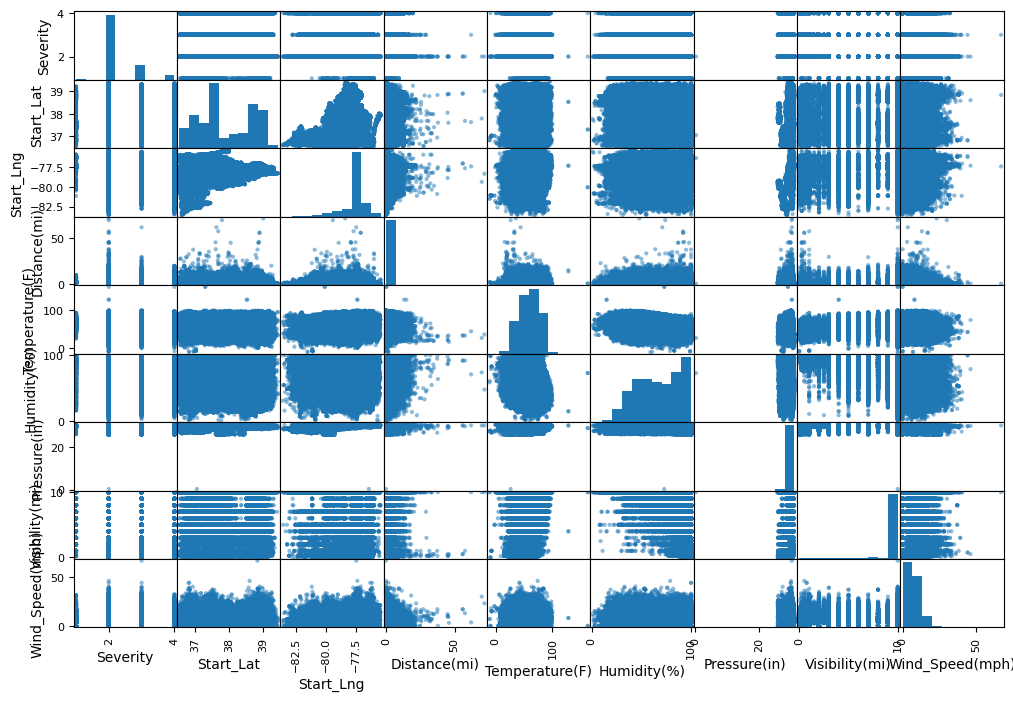

In [41]:
attributes = []
for c in data.select_dtypes(include=[np.number]).corr().columns:
  attributes.append(c)
scatter_matrix(data[attributes], figsize=(12, 8))

---
## 3. Data Cleaning

In [ ]:
sample_incomplete_rows = data[data.isnull().any(axis=1)].head()
#data = data.dropna()
sample_incomplete_rows

In [23]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train = [];
y_train = [];
X_test = [];
y_test = [];

X_train, X_test, y_train, y_test = train_test_split(data, data['Severity'], test_size=0.20, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(data, data['Temperature(F)'], test_size=0.99, random_state=42)

corr_matrix = data.select_dtypes(include=[np.number]).corr()
print(f'corr_matrix.shape: {corr_matrix.shape}')
print(corr_matrix["Severity"].sort_values(ascending=False))
#print(X_train.shape)
X_train.drop("Severity", axis=1, inplace=True)
#print(X_train.shape)

corr_matrix.shape: (9, 9)
Severity           1.000000
Wind_Speed(mph)    0.017052
Humidity(%)        0.013891
Temperature(F)     0.010165
Start_Lat         -0.000670
Visibility(mi)    -0.010994
Pressure(in)      -0.014749
Distance(mi)      -0.030211
Start_Lng         -0.048406
Name: Severity, dtype: float64


In [24]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#data_num = data.select_dtypes(include=[np.number])
data_num = X_train.select_dtypes(include=[np.number])
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        #('std_scaler', StandardScaler()),
        #('std_scaler', StandardScaler()),
    ])

data_num_tr = num_pipeline.fit_transform(data_num)

#cat = ['']
#data_cat = pd.DataFrame(data, columns=cat)
data_cat = data.select_dtypes(include=['object'])

num_attribs = list(data_num)
cat_attribs = list(data_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        #("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
        #("cat", OneHotEncoder(), cat_attribs),
    ])

X_test = X_test.drop("Severity", axis=1)
X_test = full_pipeline.fit_transform(X_test)

X_train = full_pipeline.fit_transform(X_train)
X_train.shape

(242640, 8)

---
## 4. Model Selection

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.model_selection import cross_val_predict, cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [53]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=50, random_state=42))
#ovo_clf.fit(X_train, y_train)
#y_train_pred = ovo_clf.predict(X_test)
y_train_pred = cross_val_predict(ovo_clf, X_train, y_train, cv=3)

confusion = confusion_matrix(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred, average='micro')
precision = precision_score(y_train, y_train_pred, average='micro')
f1 = f1_score(y_train, y_train_pred, average='micro')

print(f'\nconfusion:\n{confusion}\nrecall: {recall}\nprecision: {precision}\nf1: {f1}')

ovo_clf.fit(X_train, y_train)
y_pred = ovo_clf.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1 = f1_score(y_train, y_train_pred, average='micro')

#confusion = confusion_matrix(y_test, y_pred)
print(f'\nTest set\nconfusion:\n{confusion}\nrecall: {recall}\nprecision: {precision}\nf1: {f1}')

c:\Users\arnol\Desktop\UVA\7th semester\CS 4774 Machine Learning\4774-project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\arnol\Desktop\UVA\7th semester\CS 4774 Machine Learning\4774-project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\arnol\Desktop\UVA\7th semester\CS 4774 Machine Learning\4774-project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\arnol\Desktop\UVA\7th semester\CS 4774 Machine Learning\4774-project\env\Lib\site-packages\sklearn\linear_model\_st


confusion:
[[     0   2510      0      0]
 [     0 184358      3      1]
 [     0  41242      2      0]
 [     0  14524      0      0]]
recall: 0.7598087701945269
precision: 0.7598087701945269
f1: 0.7598087701945269


c:\Users\arnol\Desktop\UVA\7th semester\CS 4774 Machine Learning\4774-project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\arnol\Desktop\UVA\7th semester\CS 4774 Machine Learning\4774-project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\arnol\Desktop\UVA\7th semester\CS 4774 Machine Learning\4774-project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\arnol\Desktop\UVA\7th semester\CS 4774 Machine Learning\4774-project\env\Lib\site-packages\sklearn\linear_model\_st


Test set
confusion:
[[    0   593     3     9]
 [    1 46153    65    79]
 [    0  9999    35    46]
 [    0  3671     2     5]]
recall: 0.7614942055027117
precision: 0.7614942055027117
f1: 0.7598087701945269


c:\Users\arnol\Desktop\UVA\7th semester\CS 4774 Machine Learning\4774-project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [54]:
ovr_clf = OneVsRestClassifier(SGDClassifier(max_iter=50, random_state=42))
#ovo_clf.fit(X_train, y_train)
#y_train_pred = ovo_clf.predict(X_test)
y_train_pred = cross_val_predict(ovr_clf, X_train, y_train, cv=3)

confusion = confusion_matrix(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred, average='micro')
precision = precision_score(y_train, y_train_pred, average='micro')
f1 = f1_score(y_train, y_train_pred, average='micro')

print(f'\nconfusion:\n{confusion}\nrecall: {recall}\nprecision: {precision}\nf1: {f1}')

ovr_clf.fit(X_train, y_train)
y_pred = ovr_clf.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1 = f1_score(y_train, y_train_pred, average='micro')

#confusion = confusion_matrix(y_test, y_pred)
print(f'\nTest set\nconfusion:\n{confusion}\nrecall: {recall}\nprecision: {precision}\nf1: {f1}')

c:\Users\arnol\Desktop\UVA\7th semester\CS 4774 Machine Learning\4774-project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\arnol\Desktop\UVA\7th semester\CS 4774 Machine Learning\4774-project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\arnol\Desktop\UVA\7th semester\CS 4774 Machine Learning\4774-project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\arnol\Desktop\UVA\7th semester\CS 4774 Machine Learning\4774-project\env\Lib\site-packages\sklearn\linear_model\_st


confusion:
[[     0   2510      0      0]
 [     0 184360      2      0]
 [     0  41244      0      0]
 [     0  14524      0      0]]
recall: 0.7598087701945269
precision: 0.7598087701945269
f1: 0.7598087701945269


c:\Users\arnol\Desktop\UVA\7th semester\CS 4774 Machine Learning\4774-project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\arnol\Desktop\UVA\7th semester\CS 4774 Machine Learning\4774-project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\arnol\Desktop\UVA\7th semester\CS 4774 Machine Learning\4774-project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



Test set
confusion:
[[    0    12   593     0]
 [    0  2286 43759   253]
 [    0   403  9651    26]
 [    0   237  3388    53]]
recall: 0.19765582499464235
precision: 0.19765582499464235
f1: 0.7598087701945269


c:\Users\arnol\Desktop\UVA\7th semester\CS 4774 Machine Learning\4774-project\env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [55]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [0.58487404 0.57978801 0.5816405  0.58073704 0.58772287]
Mean: 0.5829524912077826
Standard deviation: 0.0029357231386978517


In [56]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [0.68270155 0.67599434 0.67824317 0.67859514 0.67910656]
Mean: 0.6789281509295713
Standard deviation: 0.002165998581822343


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

KeyboardInterrupt: 

In [26]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)

# Use cross_val_score with f1_score as the scoring metric
scores = cross_val_score(tree_clf, X_train, y_train, scoring="f1_micro", cv=5)

display_scores(scores)
tree_clf.fit(X_train, y_train)
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)
confusion = confusion_matrix(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred, average='micro')
precision = precision_score(y_train, y_train_pred, average='micro')
f1 = f1_score(y_train, y_train_pred, average='micro')

print(f'\nconfusion:\n{confusion}\nrecall: {recall}\nprecision: {precision}\nf1: {f1}')

Scores: [0.80495796 0.80844049 0.80930597 0.80761622 0.8078635 ]
Mean: 0.8076368282228816
Standard deviation: 0.0014601385526940088

confusion:
[[  1135   1252    114      9]
 [  1717 161962  10505  10178]
 [   158  10175  30063    848]
 [    13  10907    799   2805]]
recall: 0.8076368282228816
precision: 0.8076368282228816
f1: 0.8076368282228816


In [60]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf, 
                   feature_names=num_attribs,  
                   class_names=['1', '2', '3', '4'],
                   filled=True)


confusion:
[[     0   2510      0      0]
 [     0 184360      2      0]
 [     0  41244      0      0]
 [     0  14524      0      0]]
recall: 0.7598087701945269
precision: 0.7598087701945269
f1: 0.7598087701945269
Error in callback <function _draw_all_if_interactive at 0x000001F69784AE80> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001F6978C3CE0> (for post_execute):


KeyboardInterrupt: 

In [10]:
from sklearn.ensemble import RandomForestRegressor

forest_clf = RandomForestRegressor(n_estimators=100, random_state=42)

# Use cross_val_score with f1_score as the scoring metric
scores = cross_val_score(forest_clf, X_train, y_train, scoring="f1_micro", cv=5)

display_scores(scores)

Scores: [1. 1. 1. 1. 1.]
Mean: 1.0
Standard deviation: 0.0
